<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.337153,35.448090,27.563931,-23.541928,117.807245,18.146294,99.660951
1,0.0,1.0,50.551596,82.714804,64.632261,-523.074162,-315.175501,121.327059,-436.502560
2,0.0,2.0,93.886364,81.282451,60.916516,-602.015910,-355.930579,-164.472455,-191.458124
3,0.0,3.0,27.939879,87.118178,28.332499,1348.658684,1502.049241,370.123298,1131.925943
4,0.0,4.0,87.249928,94.052507,46.232301,-127.703699,109.831036,-63.552916,173.383952
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.884356,78.769918,43.706300,948.339203,1102.699776,581.257216,521.442560
19996,999.0,16.0,92.857690,86.181427,67.394726,51.175999,307.609842,581.761177,-274.151335
19997,999.0,17.0,72.995425,20.301152,47.180159,-225.088722,-74.611986,-174.888174,100.276188
19998,999.0,18.0,75.027136,99.077341,90.275888,2366.376373,2640.756739,993.690215,1647.066524


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.337153,35.448090,27.563931,-23.541928,117.807245,18.146294,99.660951
1,0.0,1.0,50.551596,82.714804,64.632261,-523.074162,-315.175501,121.327059,-436.502560
2,0.0,2.0,93.886364,81.282451,60.916516,-602.015910,-355.930579,-164.472455,-191.458124
3,0.0,3.0,27.939879,87.118178,28.332499,1348.658684,1502.049241,370.123298,1131.925943
4,0.0,4.0,87.249928,94.052507,46.232301,-127.703699,109.831036,-63.552916,173.383952
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.884356,78.769918,43.706300,948.339203,1102.699776,581.257216,521.442560
19996,999.0,16.0,92.857690,86.181427,67.394726,51.175999,307.609842,581.761177,-274.151335
19997,999.0,17.0,72.995425,20.301152,47.180159,-225.088722,-74.611986,-174.888174,100.276188
19998,999.0,18.0,75.027136,99.077341,90.275888,2366.376373,2640.756739,993.690215,1647.066524


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.337153,35.448090,27.563931,-23.541928,117.807245,18.146294,99.660951
1,0.0,1.0,50.551596,82.714804,64.632261,-523.074162,-315.175501,121.327059,-436.502560
2,0.0,2.0,93.886364,81.282451,60.916516,-602.015910,-355.930579,-164.472455,-191.458124
3,0.0,3.0,27.939879,87.118178,28.332499,1348.658684,1502.049241,370.123298,1131.925943
4,0.0,4.0,87.249928,94.052507,46.232301,-127.703699,109.831036,-63.552916,173.383952
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.884356,78.769918,43.706300,948.339203,1102.699776,581.257216,521.442560
19996,999.0,16.0,92.857690,86.181427,67.394726,51.175999,307.609842,581.761177,-274.151335
19997,999.0,17.0,72.995425,20.301152,47.180159,-225.088722,-74.611986,-174.888174,100.276188
19998,999.0,18.0,75.027136,99.077341,90.275888,2366.376373,2640.756739,993.690215,1647.066524


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    68.337153  35.448090  27.563931   -23.541928   117.807245   
      1.0    50.551596  82.714804  64.632261  -523.074162  -315.175501   
      2.0    93.886364  81.282451  60.916516  -602.015910  -355.930579   
      3.0    27.939879  87.118178  28.332499  1348.658684  1502.049241   
      4.0    87.249928  94.052507  46.232301  -127.703699   109.831036   
...                ...        ...        ...          ...          ...   
999.0 15.0   21.884356  78.769918  43.706300   948.339203  1102.699776   
      16.0   92.857690  86.181427  67.394726    51.175999   307.609842   
      17.0   72.995425  20.301152  47.180159  -225.088722   -74.611986   
      18.0   75.027136  99.077341  90.275888  2366.376373  2640.756739   
      19.0   80.428038  39.477625  91.931212   229.962570   451.799446   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     18.146294    99.660951  
      1.0    121.327059  -436.502560  
      2.0   -164.472455  -191.458124  
      3.0    370.123298  1131.925943  
      4.0    -63.552916   173.383952  
...                 ...          ...  
999.0 15.0   581.257216   521.442560  
      16.0   581.761177  -274.151335  
      17.0  -174.888174   100.276188  
      18.0   993.690215  1647.066524  
      19.0   397.260272    54.539174  

[20000 rows x 7 columns]

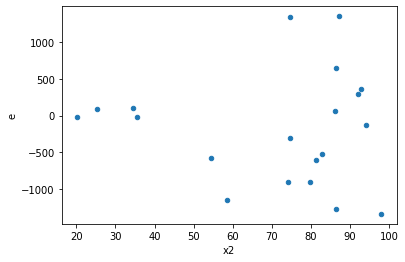

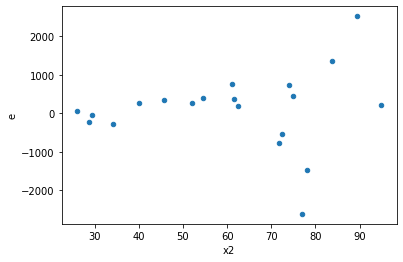

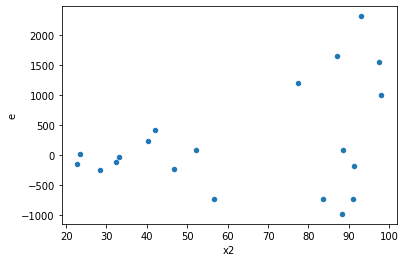

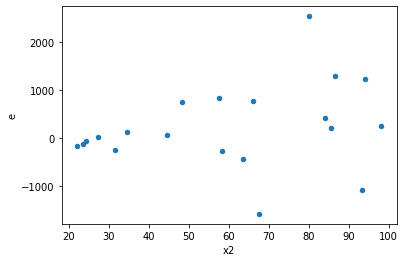

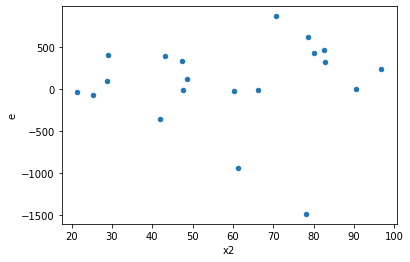

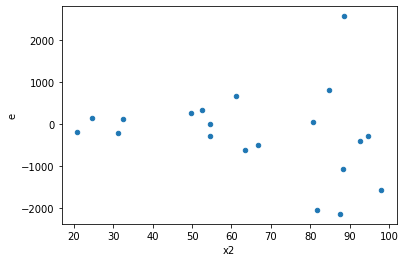

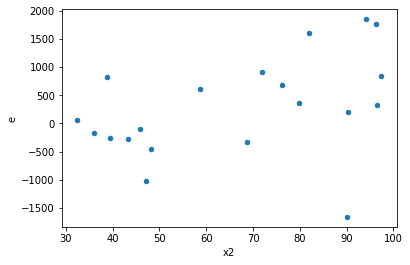

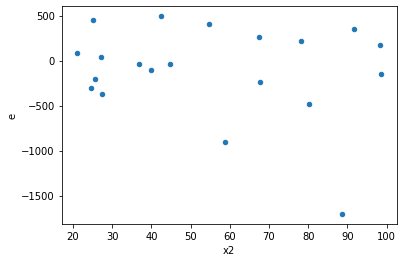

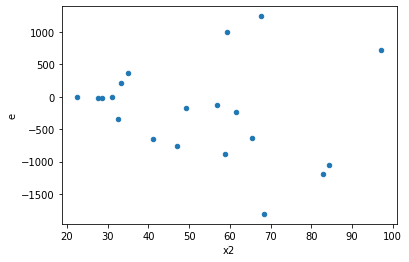

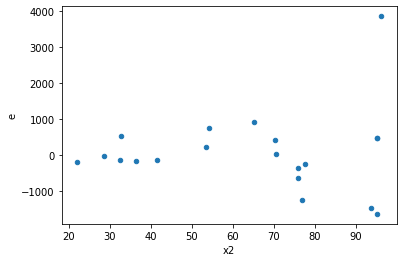

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,888291.203770589,9854979.316009648,177658.24075411778,1970995.8632019297,11.094311498501348,0.019497368503994972,0.9902513157480025,0.009748684251997486,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,2871655.7146903584,3368499.472881558,574331.1429380716,673699.8945763116,1.1730164781416956,0.8652602164506309,0.5673698917746846,0.43263010822531545,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,2082780.2674649735,2429344.5395375695,416556.0534929947,485868.9079075139,1.166395023750831,0.869992096954364,0.565003951522818,0.434996048477182,Reject005=1 : Homoscedasticity
9.0,5.0,5.0,1934319.745101732,12814356.89019373,386863.9490203464,2562871.3780387463,6.62473560673899,0.05841753658552751,0.9707912317072362,0.029208768292763754,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,584255.8423273605,1987697.408570038,116851.1684654721,397539.48171400756,3.4021010395927274,0.20515484334280476,0.8974225783285976,0.10257742167140238,Reject005=1 : Homoscedasticity
13.0,5.0,5.0,147678.2309779422,1937357.0996879344,29535.64619558844,387471.4199375869,13.118772393592023,0.013420150565100375,0.9932899247174498,0.0067100752825501875,Reject005=0 : Heteroscedasticity
15.0,5.0,5.0,617540.5795441626,5790858.007161299,123508.11590883252,1158171.6014322597,9.3772914671224,0.028147512094671923,0.985926243952664,0.014073756047335961,Reject005=0 : Heteroscedasticity
16.0,5.0,5.0,3709940.009869586,4545468.349648108,741988.0019739172,909093.6699296215,1.225213436755246,0.8290595387449309,0.5854702306275346,0.41452976937246544,Reject005=1 : Homoscedasticity
17.0,5.0,5.0,516760.2678721521,7009125.267327726,103352.05357443042,1401825.0534655452,13.563591675089468,0.0124490239895243,0.9937754880052379,0.00622451199476215,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2158042.5471081845,1017885.009743429,431608.50942163693,203577.0019486858,0.4716705011712642,0.42904524684008527,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,888291.203770589,9854979.316009648,177658.24075411778,1970995.8632019297,11.094311498501348,0.019497368503994972,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,708230.7272151307,700023.9680152622,141646.14544302615,140004.79360305244,0.9884123084688252,0.9901069099206319,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,2871655.7146903584,3368499.472881558,574331.1429380716,673699.8945763116,1.1730164781416956,0.8652602164506309,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,606220.21555428,289214.2392533396,121244.043110856,57842.84785066792,0.4770778536128243,0.43593326388951975,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,3665640.4841144895,928688.6804506673,733128.0968228979,185737.73609013346,0.25334963547987194,0.15811633326389457,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,2082780.2674649735,2429344.5395375695,416556.0534929947,485868.9079075139,1.166395023750831,0.869992096954364,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,2897605.3992447495,397949.3894717397,579521.0798489499,79589.87789434794,0.13733733018839064,0.048099991803588586,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,1143155.8995578475,503913.63490948733,228631.17991156952,100782.72698189746,0.4408091976819541,0.3896063155453599,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      695
Reject005=0 : Heteroscedasticity    305
Name: Result_test, dtype: int64